In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd 
import feather 

from utils import Utils
from database import Database

u = Utils()
db = Database('Mimir from Munnin')
np.random.seed(u.RANDOM_STATE)

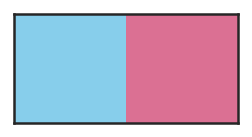

In [3]:
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

def set_style():
    plt.style.use(['seaborn-white', 'seaborn-paper'])
    matplotlib.rc("font", family="Arial")
set_style()

custom_palette = ['skyblue','palevioletred']
sns.set_palette(custom_palette)
sns.palplot(custom_palette)

In [4]:
scores = u.load_df('compiled')

## Volcano plot

/home/pc2800/envs/sex_risks/lib/python3.5/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
/home/pc2800/envs/sex_risks/lib/python3.5/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log


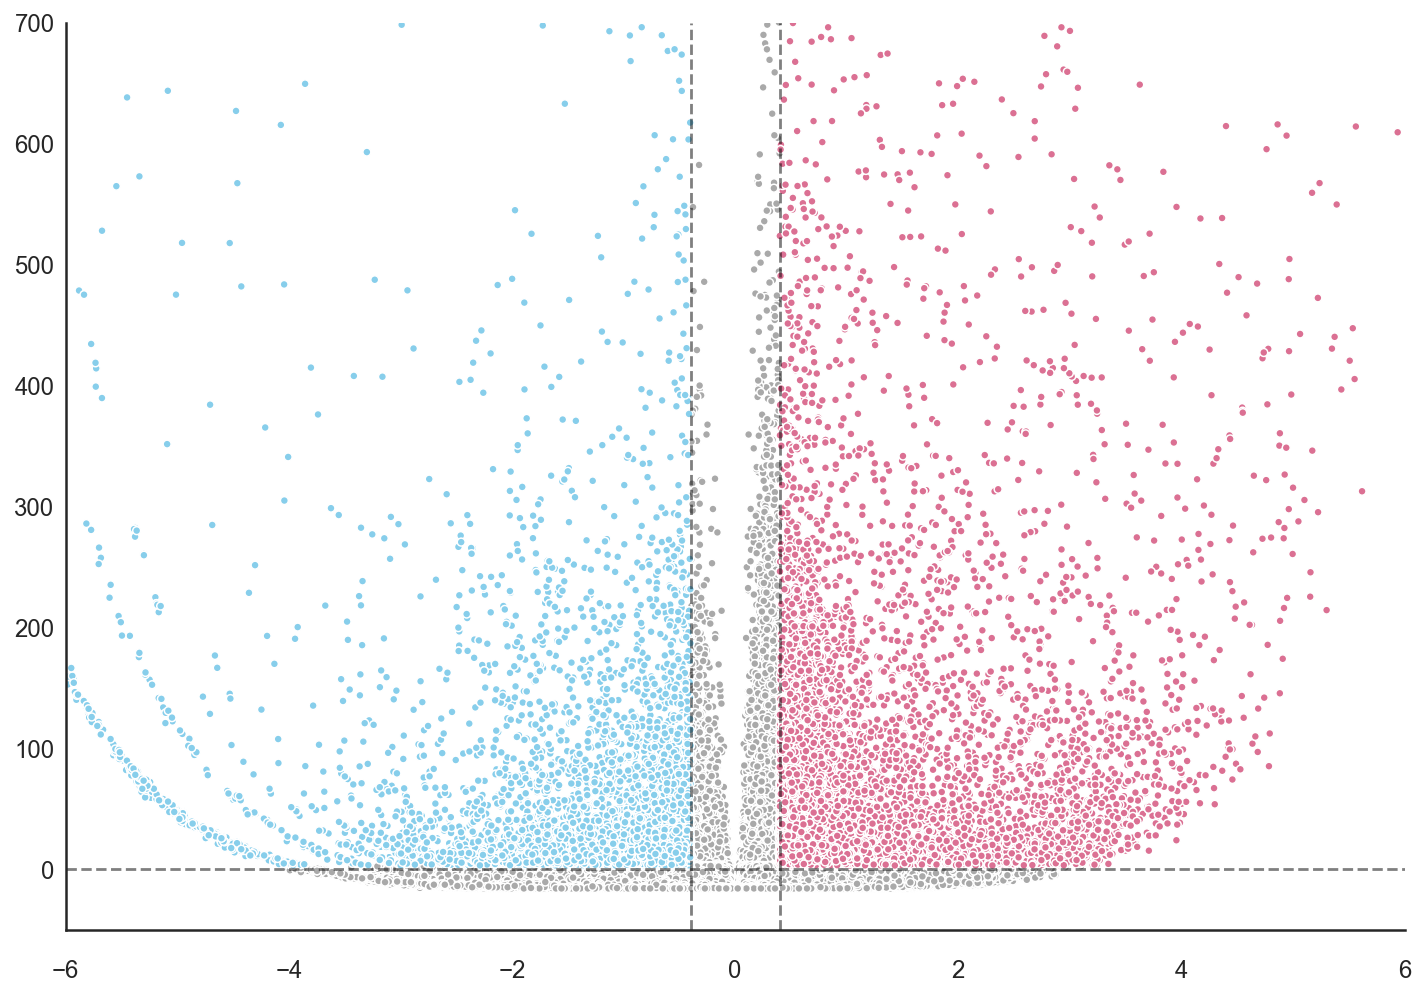

In [13]:
set_style()
fig, ax = plt.subplots(1, sharex=False, sharey=False, figsize=(10,7))
ax = fig.get_axes()[0] 

x_lim = (-6,6)
y_lim = (-50, 700)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)

for val in [0.4, -0.4]: 
    ax.vlines(val, y_lim[0], y_lim[1], 'k','dashed', alpha=0.5)

for val in [0.05]: 
    ax.hlines(val, x_lim[0], x_lim[1], 'k','dashed', alpha=0.5)

df = scores.query('logROR_avg<0.4 and logROR_avg>-0.4')
y = -np.log(df['p_val_max'])
x = df['logROR_avg']
hue = df.get('logROR_avg').values>0
sns.scatterplot( x, y, ax=ax, color='darkgray', size=10)

df = scores.query('p_val_max>0.05')
y = -np.log(df['p_val_max'])
x = df['logROR_avg']
hue = df.get('logROR_avg').values>0
sns.scatterplot( x, y, ax=ax, color='darkgray', size=10)

df = scores.query('p_val_max<=0.05').query('logROR_avg>0.4 or logROR_avg<-0.4')
y = -np.log(df['p_val_max'])
x = df['logROR_avg']
hue = df.get('logROR_avg').values>0
sns.scatterplot( x, y, ax=ax, hue=hue, size=12)

sns.despine()
ax.tick_params(labelsize=12)
ax.tick_params('x', pad=15)
plt.title('')
plt.xlabel('')
plt.ylabel('')
ax.legend([])

plt.tight_layout()
plt.show()

## Distribution of all logROR

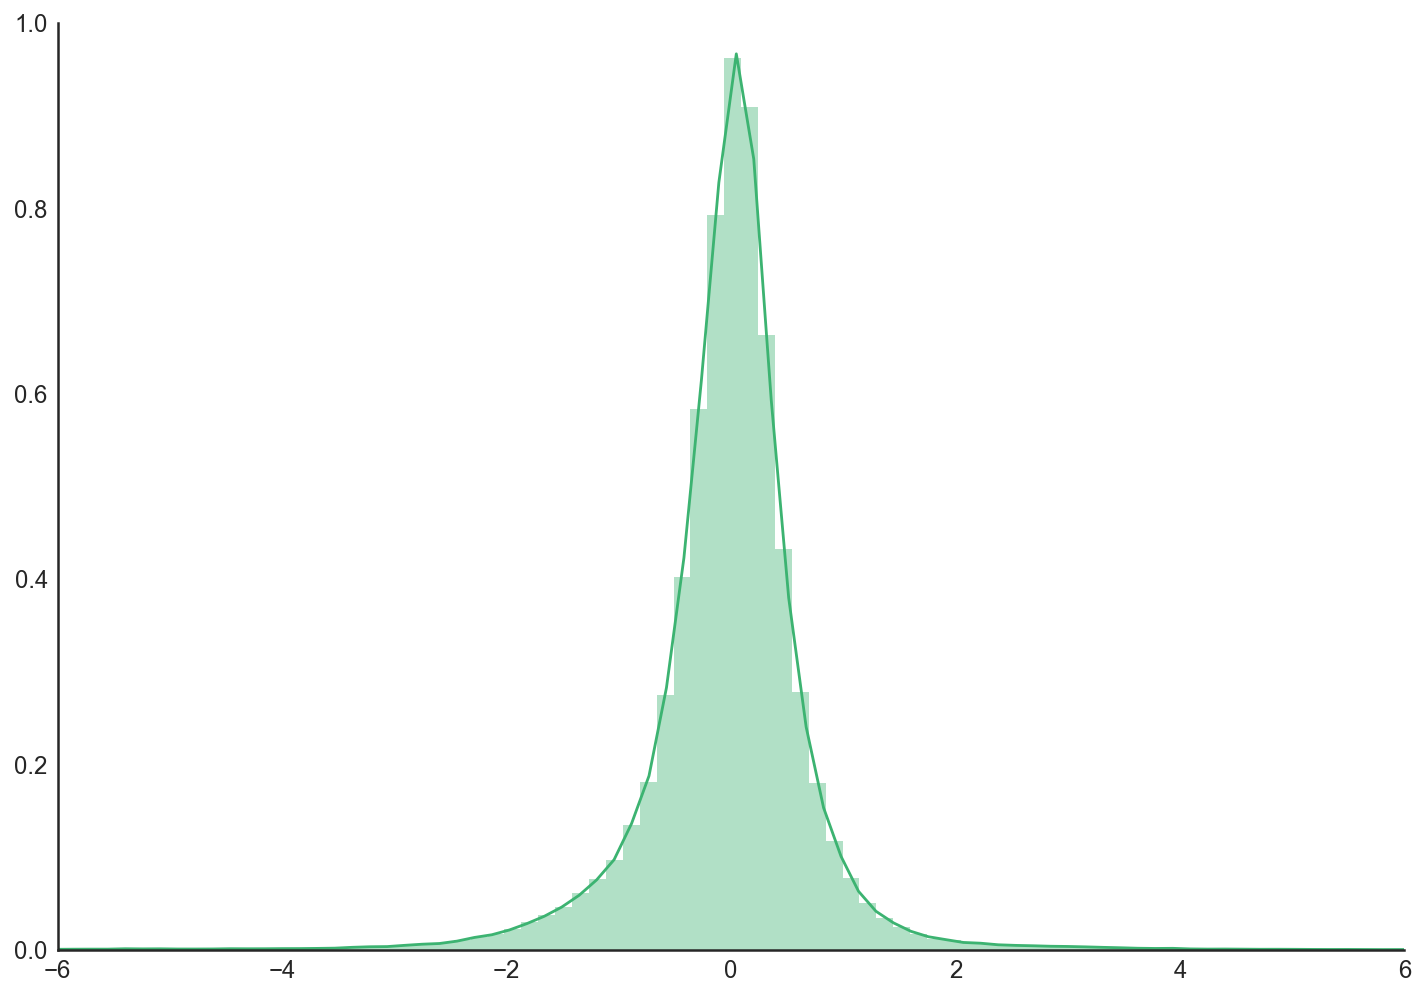

In [14]:
set_style()
fig, ax = plt.subplots(1, sharex=False, sharey=False, figsize=(10,7))
ax = fig.get_axes()[0] 

x_lim = (-6,6)
y_lim = (-0.1, 1)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)

x = scores.get('logROR_avg').values
sns.distplot(x, color='mediumseagreen',bins=100)

sns.despine()
ax.tick_params(labelsize=12, pad=5)
plt.title('')
plt.xlabel('')
plt.ylabel('')
ax.legend([])

plt.tight_layout()
plt.show()

## Distribution of significant logROR

In [5]:
scores = scores.query('p_val_max<0.05')

hide = u.load_np('adr_hide')
scores = scores.query('adr_name not in @hide')

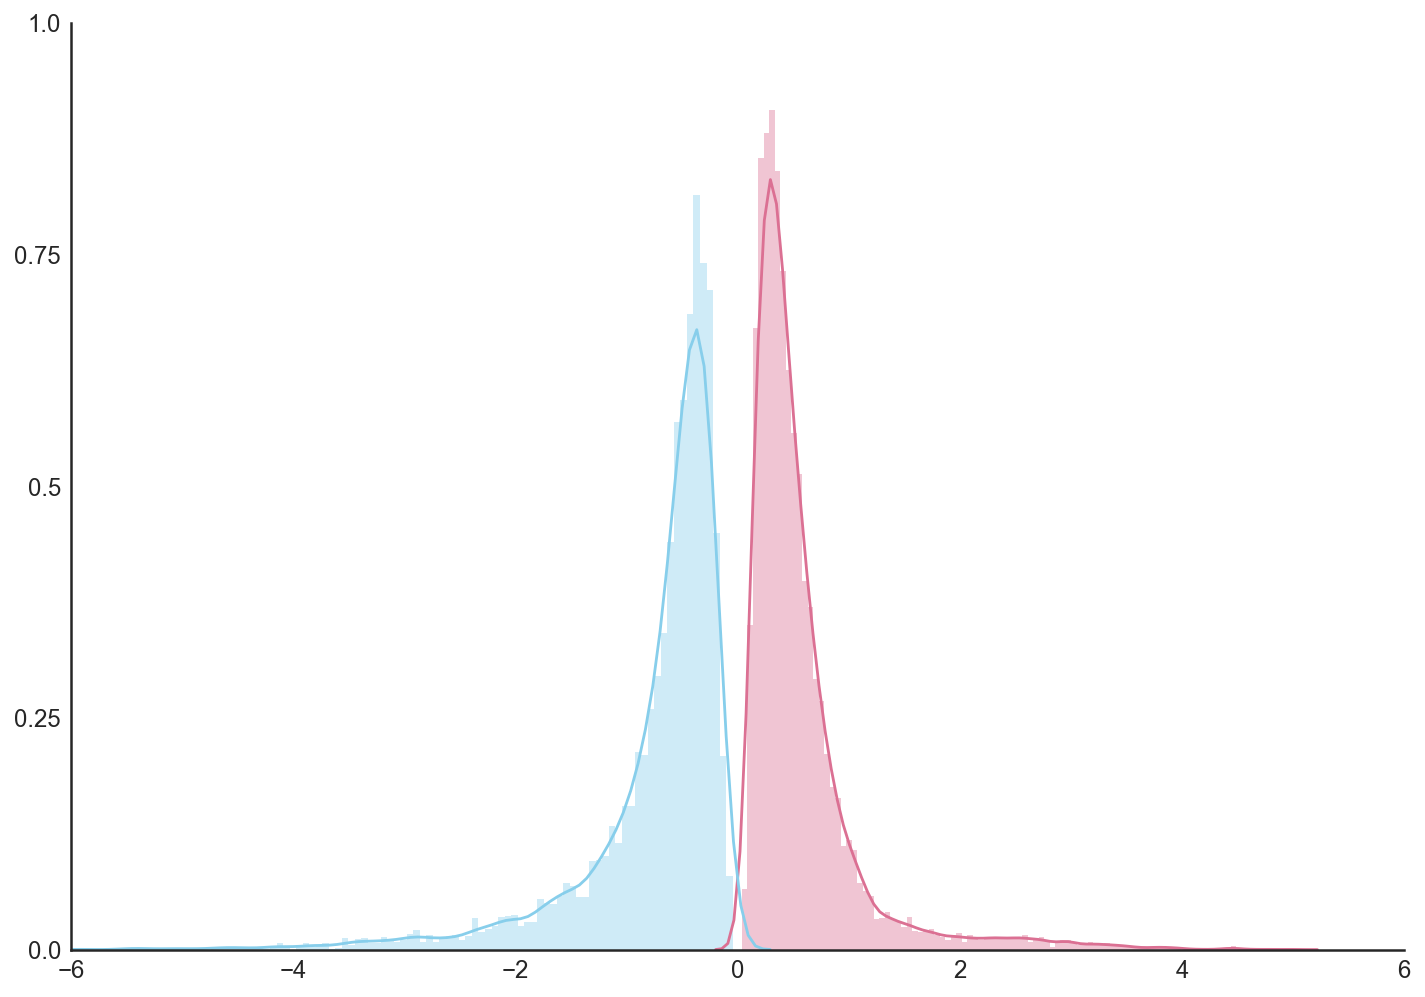

In [6]:
set_style()
fig, ax = plt.subplots(1, sharex=False, sharey=False, figsize=(10,7))
ax = fig.get_axes()[0] 

x_lim = (-6,6)
#y_lim = (-0.1, 1)
ax.set_xlim(x_lim)
#ax.set_ylim(y_lim)

x = scores.query('logROR_avg>0').get('logROR_avg').values
sns.distplot(x, color='palevioletred',bins=100,norm_hist=False)

x = scores.query('logROR_avg<0').get('logROR_avg').values
sns.distplot(x, color='skyblue',bins=100)

sns.despine()
ax.tick_params(labelsize=12, pad=5)
plt.title('')
plt.xlabel('')
plt.ylabel('')
ax.set_yticks([0,0.5,1,1.5,2], minor=False)
ticks = list([str(round(x,2)) for x in np.linspace(0,1,5)])
ax.set_yticklabels(ticks)
ax.legend([])

plt.tight_layout()
plt.show()